In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Инициализация данных

In [3]:
df = pd.read_csv("drive/MyDrive/data/briliant/diamonds.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Пропусков нет

In [6]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [7]:
df.drop_duplicates(inplace=True)

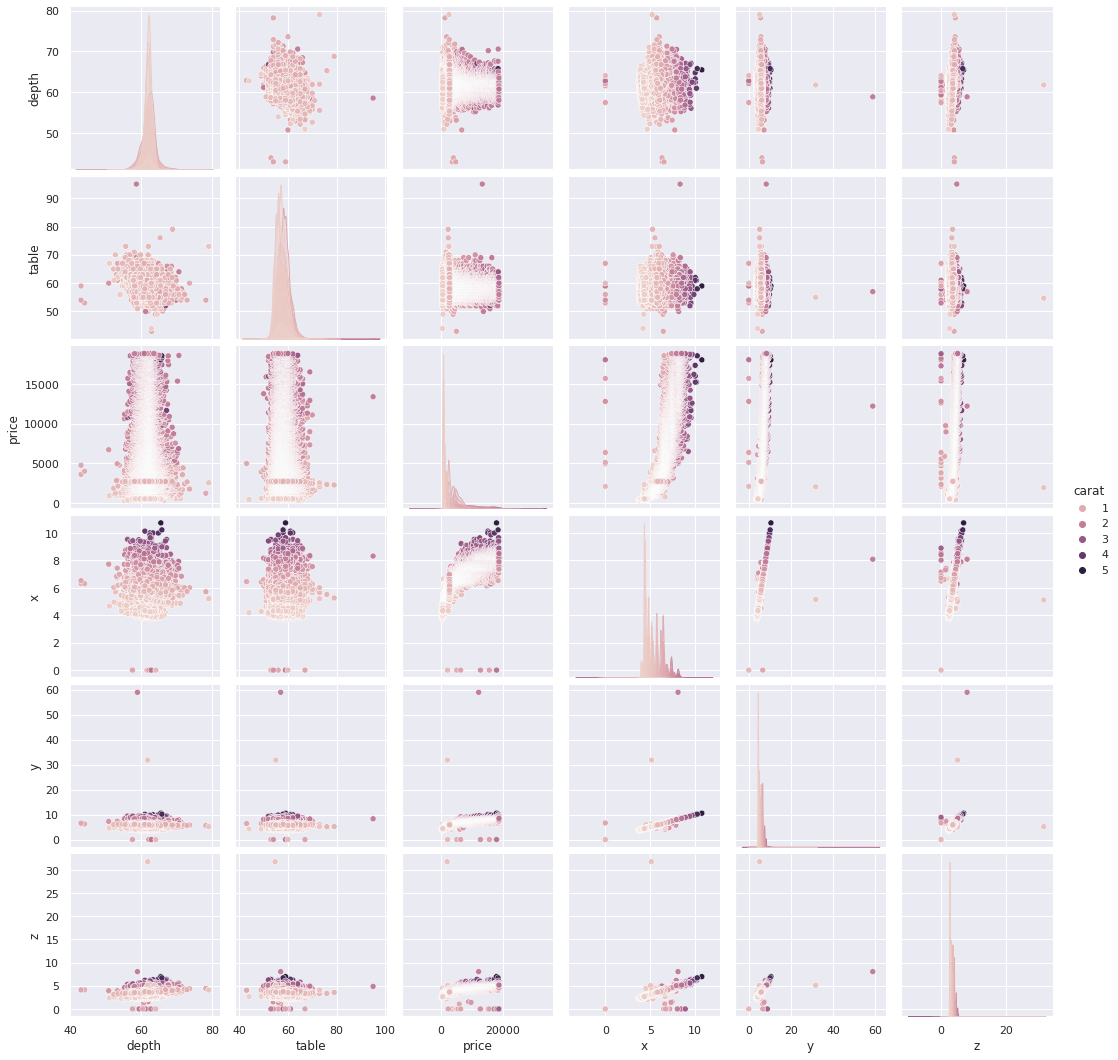

In [9]:
sns.pairplot(df, kind="scatter", hue="carat")

In [10]:
df = df[df['y']<10]
df = df[df['y']>1]

df = df[df['carat']<df.carat.max()]

In [11]:
df = df[df['depth']<75]
df = df[df['depth']>45]

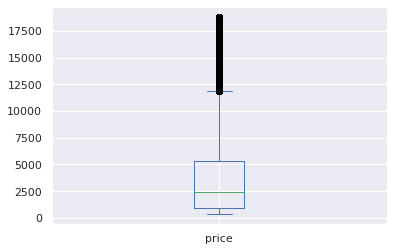

In [12]:
_, bp = df.price.plot.box(return_type='both')

In [13]:
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df = df[df.price.isin(outliers) == False]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


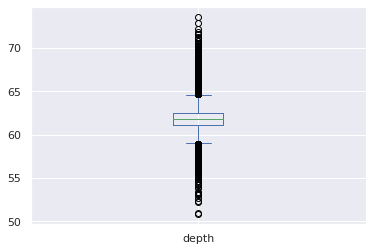

In [14]:
_, bp = df.depth.plot.box(return_type='both')

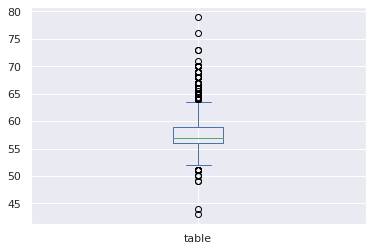

In [15]:
_, bp = df.table.plot.box(return_type='both')

In [16]:
df = df[df['table']<90]

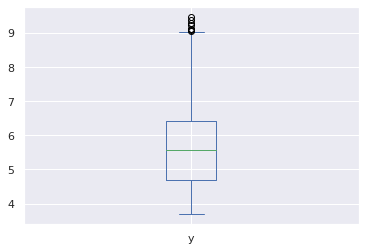

In [17]:
_, bp = df.y.plot.box(return_type='both')

In [18]:
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df = df[df.y.isin(outliers) == False]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


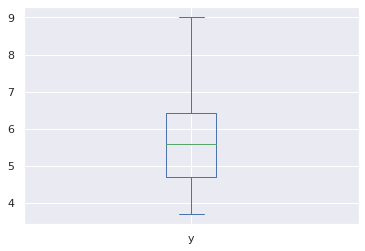

In [19]:
_, bp = df.y.plot.box(return_type='both')

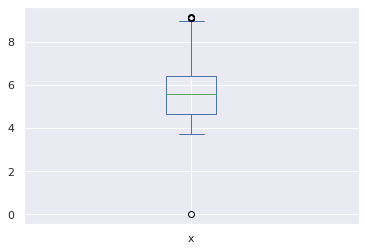

In [20]:
_, bp = df.x.plot.box(return_type='both')

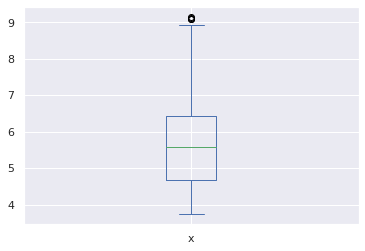

In [21]:
df = df[df.x>1]
_, bp = df.x.plot.box(return_type='both')

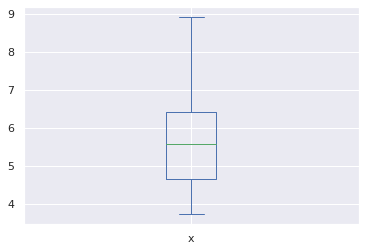

In [22]:
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df = df[df.x.isin(outliers) == False]
_, bp = df.x.plot.box(return_type='both')

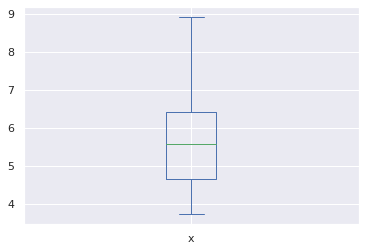

In [23]:
_, bp = df.x.plot.box(return_type='both')

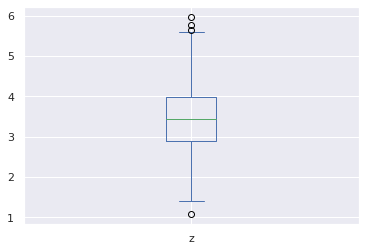

In [24]:
df = df[df.z>1]
df = df[df.z<30]
_, bp = df.z.plot.box(return_type='both')

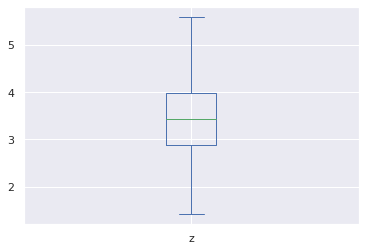

In [25]:
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df = df[df.z.isin(outliers) == False]
_, bp = df.z.plot.box(return_type='both')

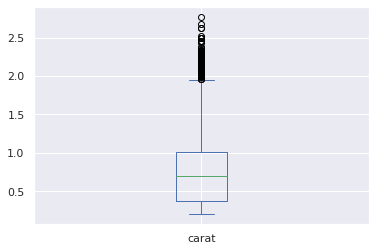

In [26]:
_, bp = df.carat.plot.box(return_type='both')

# Кодирование символов

In [27]:
swap = {"cut": {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4},
"color": {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6},
"clarity": {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
}


df.replace(swap, inplace=True)

In [28]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,50232.000000,50232.000000,50232.000000,50232.000000,50232.000000,50232.000000,50232.000000,50232.000000,50232.000000,50232.000000
mean,0.722893,2.906494,3.453118,3.078834,61.754772,57.422414,3158.265707,5.582456,5.585186,3.447972
std,0.381488,1.120605,1.689746,1.649456,1.415400,2.226486,2762.732981,0.991089,0.983686,0.613790
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,1.410000
25%,0.380000,2.000000,2.000000,2.000000,61.100000,56.000000,911.000000,4.670000,4.680000,2.880000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2155.000000,5.590000,5.580000,3.430000
75%,1.010000,4.000000,5.000000,4.000000,62.500000,59.000000,4667.250000,6.430000,6.420000,3.980000
max,2.770000,4.000000,6.000000,7.000000,73.600000,79.000000,11883.000000,8.930000,8.830000,5.600000


# Тепловая карта

<AxesSubplot:>

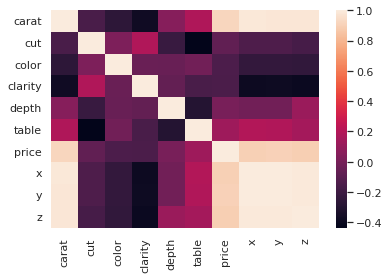

In [29]:
sns.heatmap(df.corr())

# Нормализация

In [30]:
from sklearn import preprocessing

In [31]:
scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.Normalizer().fit(df)
#scaler = preprocessing.RobustScaler()
#scaler = preprocessing.StandardScaler()
names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.011673,1.00,0.833333,0.142857,0.469298,0.333333,0.000000,0.042308,0.058252,0.243437
1,0.003891,0.75,0.833333,0.285714,0.394737,0.500000,0.000000,0.030769,0.031068,0.214797
2,0.011673,0.25,0.833333,0.571429,0.267544,0.611111,0.000087,0.061538,0.075728,0.214797
3,0.035019,0.75,0.166667,0.428571,0.508772,0.416667,0.000692,0.090385,0.106796,0.291169
4,0.042802,0.25,0.000000,0.142857,0.548246,0.416667,0.000779,0.117308,0.130097,0.319809


# Линейная ререссия

In [32]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing

In [33]:
X, y = scaled_df[['carat']], scaled_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


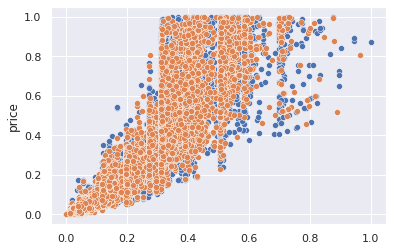

In [34]:
sns.scatterplot(x=X_train.to_numpy().ravel(), y=y_train)
sns.scatterplot(x=X_test.to_numpy().ravel(), y=y_test);

In [35]:
line_model = LinearRegression()
line_model.fit(X_train, y_train)

y_pred = line_model.predict(X_test)

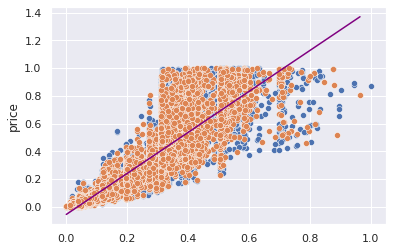

In [36]:
sns.scatterplot(x=X_train.to_numpy().ravel(), y=y_train)
sns.scatterplot(x=X_test.to_numpy().ravel(), y=y_test)
sns.lineplot(x=X_test.to_numpy().ravel(), y=y_pred, color='purple');

In [37]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.8420319181603282, 0.009087766674344978)

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(3)
X_poly = poly_features.fit_transform(X)

In [43]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred = poly_model.predict(X_poly)

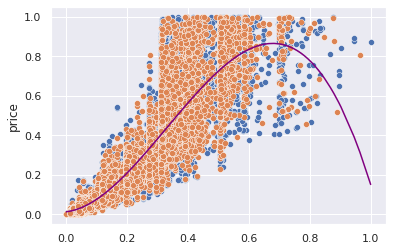

In [44]:
sns.scatterplot(x=X_train.to_numpy().ravel(), y=y_train)
sns.scatterplot(x=X_test.to_numpy().ravel(), y=y_test)

sns.lineplot(x=X.to_numpy().ravel(), y=y_pred, color='purple');

In [45]:
r2_score(y, y_pred), mean_squared_error(y, y_pred)

(0.8569409762015745, 0.008175121377019553)

In [72]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
reg = make_pipeline(preprocessing.RobustScaler(), 
                    SGDRegressor(max_iter=1000, tol=1e-3))

In [82]:
ans = reg.fit(X_train, y_train)
y_pred = ans.predict(X)

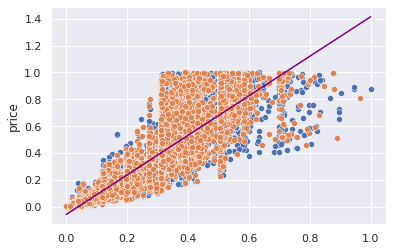

In [83]:
sns.scatterplot(x=X_train.to_numpy().ravel(), y=y_train)
sns.scatterplot(x=X_test.to_numpy().ravel(), y=y_test)
sns.lineplot(x=X.to_numpy().ravel(), y=y_pred, color='purple');

In [84]:
r2_score(y, y_pred), mean_squared_error(y, y_pred)

(0.841413338574683, 0.00906244969038115)